In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
iris_df=pd.read_csv('./Iris.csv')
print(iris_df)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-v

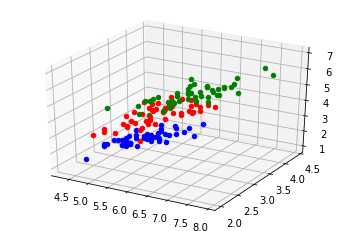

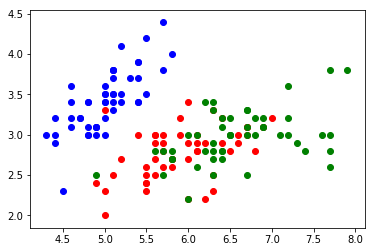

In [121]:
#可视化原始数据(前三维)
iris_data=np.array(iris_df)
n=np.size(iris_data,0)
fig=plt.figure();
ax=fig.add_subplot(111,projection='3d')
for i in range(n):
    if(iris_data[i,0]//50==0):
        ax.scatter3D(iris_data[i,1],iris_data[i,2],iris_data[i,3],c='b')
    if(iris_data[i,0]//50==1):
        ax.scatter3D(iris_data[i,1],iris_data[i,2],iris_data[i,3],c='r')
    if(iris_data[i,0]//50==2):
        ax.scatter3D(iris_data[i,1],iris_data[i,2],iris_data[i,3],c='g')

fig_=plt.figure();
ax=fig_.add_subplot(111)
for i in range(n):
    if(iris_data[i,0]//50==0):
        ax.scatter(iris_data[i,1],iris_data[i,2],c='b')
    if(iris_data[i,0]//50==1):
        ax.scatter(iris_data[i,1],iris_data[i,2],c='r')
    if(iris_data[i,0]//50==2):
        ax.scatter(iris_data[i,1],iris_data[i,2],c='g')

In [49]:
#划分训练及测试集
x=iris_df.iloc[:,1:-1].values
label=iris_df.iloc[:,-1].values
for i in range(1,4):
    label[50*i-50:50*i]=i
x_train,x_test,label_train,label_test=train_test_split(x,label,test_size=0.3,random_state=0)
label_train

array([2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 1, 3, 2, 2, 2, 2,
       3, 1, 1, 3, 2, 1, 1, 2, 1, 3, 2, 1, 2, 3, 2, 1, 3, 3, 3, 3, 1, 1,
       3, 3, 1, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 2, 1, 3, 1, 3, 1, 1, 3, 1, 3, 2, 2, 2, 3, 3, 2,
       2, 1, 2, 3, 3, 1, 2, 2, 2, 2, 1, 1, 1, 3, 2, 3, 1], dtype=object)

In [42]:
#预处理(标准化)
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_train_std=s.fit_transform(x_train)
x_test_std=s.transform(x_test)

In [52]:
#计算类内散布矩阵S_w
S_w=np.zeros([4,4])
label_num=[0,0,0]
s_w=[0,0,0]
mean=np.zeros([4,3])
for i in range(0,len(x_train)):
    label_num[label_train[i]-1]=label_num[label_train[i]-1]+1
    mean[:,label_train[i]-1]=mean[:,label_train[i]-1]+x_train_std[i,:]

mean=mean/np.array(label_num)

for i in range(0,len(x_train)):
    v=x_train_std[i,:].reshape(-1,1)-mean[:,label_train[i]-1].reshape(-1,1)
    m=v.dot(v.reshape(1,4))
    s_w[label_train[i]-1]=s_w[label_train[i]-1]+m

S_w=s_w[0]/label_num[0]+s_w[1]/label_num[0]+s_w[2]/label_num[0]
S_w

array([[1.15435889, 0.83125343, 0.3771592 , 0.21308117],
       [0.83125343, 2.07183198, 0.24480012, 0.31871349],
       [0.3771592 , 0.24480012, 0.18623953, 0.10698993],
       [0.21308117, 0.31871349, 0.10698993, 0.20776559]])

In [83]:
#计算类间散布矩阵
S_b=np.zeros([4,4])
mean_all=sum(mean.T).reshape(-1,1)
for i in range(3):
    S_b=S_b+(mean[:,i].reshape(-1,1)-mean_all).dot((mean[:,i].reshape(-1,1)-mean_all).reshape(1,-1))
S_b=S_b/3
S_b

array([[ 0.61272996, -0.30839712,  0.748256  ,  0.74804729],
       [-0.30839712,  0.34654257, -0.42594739, -0.39514916],
       [ 0.748256  , -0.42594739,  0.92648142,  0.91831141],
       [ 0.74804729, -0.39514916,  0.91831141,  0.9150655 ]])

In [91]:
S=np.linalg.inv(S_w).dot(S_b)
eig,vec=np.linalg.eig(S)
eig,vec

(array([ 1.06748575e+01,  8.68972908e-02,  3.73478062e-16, -5.05058213e-16]),
 array([[ 0.22158181,  0.04416644,  0.6207052 , -0.84066734],
        [ 0.09939388,  0.30082085, -0.17627643,  0.12378097],
        [-0.88495609, -0.6141589 , -0.74593079,  0.32233755],
        [-0.39733497,  0.72826162,  0.16504221,  0.41719923]]))

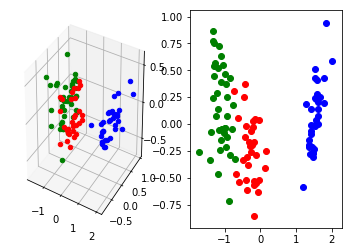

In [128]:
#降维至二维及三维
p1=vec[:,0]
p2=vec[:,1]
p3=vec[:,2]
P_3=np.c_[p1,p2,p3].T
P_2=np.c_[p1,p2].T
z_train_3=P_3.dot(x_train_std.T).T
z_train_2=P_2.dot(x_train_std.T).T
fig=plt.figure();
ax1=fig.add_subplot(121,projection='3d')
ax2=fig.add_subplot(122)
for i in range(len(label_train)):
    if(label_train[i]==1):
        ax1.scatter3D(z_train_3[i,0],z_train_3[i,1],z_train_3[i,2],c='b')
        ax2.scatter(z_train_2[i,0],z_train_2[i,1],c='b')
    if(label_train[i]==2):
        ax1.scatter3D(z_train_3[i,0],z_train_3[i,1],z_train_3[i,2],c='r')
        ax2.scatter(z_train_2[i,0],z_train_2[i,1],c='r')
    if(label_train[i]==3):
        ax1.scatter3D(z_train_3[i,0],z_train_3[i,1],z_train_3[i,2],c='g')
        ax2.scatter(z_train_2[i,0],z_train_2[i,1],c='g')